In [74]:
import pandas as pd
import glob
import numpy as np


file_list = glob.glob('./raw/*.xlsx')
df_list = []

for file in file_list:
    df = pd.read_excel(file)
    df_list.append(df)

# 모든 데이터프레임 합치기
klue_df = pd.concat(df_list, ignore_index=True)

# CSV 파일로 저장
klue_df.to_csv('klue_no_preprocessing.csv', index=False, encoding='utf-8')
klue_df.drop(columns=["Idx"], inplace=True)

In [75]:
numerical_columns = ["Average Score", "Attd_rate", "avg_study", "avg_diff", "avg_performance", "avg_satisfaction", "recc_rate"]
klue_df = klue_df.dropna(subset=numerical_columns, how='all')

attendance_rate_dict = {
    "매번함" : 1.0,
    "자주함" : 0.75,
    "종종함" : 0.5,
    "거의안함": 0.25,
    "아예안함": 0,
    "정보 없음": np.nan
}
klue_df['Attd_rate'] = klue_df["Attd_rate"].apply(lambda x: attendance_rate_dict[x])
klue_df.dropna(subset=["Attd_rate"])

klue_df.rename(columns={
    "Average Score": "course evaluation",
    "Attd_rate": "attendance rate",
    "avg_study": "learning load",
    "avg_diff": "course difficulty",
    "avg_performance": "teaching ability",
    "avg_satisfaction": "achievement level",
    "recc_rate": "recommendation rate"
}, inplace=True)

klue_df.to_csv("klue_preprocessing.csv", encoding="utf-8")
klue_df

,ID,Class,Title,Year,Semester,course evaluation,attendance rate,learning load,course difficulty,teaching ability,achievement level,recommendation rate
4,SEDU330,04,학교폭력예방및학생의이해*Course not open for foreign excha...,2023,2학기,3.8,0.75,3.2,2.6,2.8,3.3,8.3%
6,SEDU330,02,학교폭력예방및학생의이해*Course not open for foreign excha...,2023,2학기,4.3,1.00,3.1,2.8,4.2,3.5,46.2%
7,SEDU330,01,학교폭력예방및학생의이해*Course not open for foreign excha...,2023,2학기,4.3,0.75,3.1,2.9,4.3,3.7,61.1%
8,SEDU313,03,교육행정및교육경영*Course not open for foreign exchange...,2023,2학기,4.7,1.00,2.7,2.7,4.0,4.1,71.4%
9,SEDU313,02,교육행정및교육경영*수업시작시간 8:40 *Course not open for for...,2023,2학기,3.8,1.00,3.2,3.1,3.4,3.1,30.0%
...,...,...,...,...,...,...,...,...,...,...,...,...
76234,NRSG243,00,기초간호과학III,2017,1학기,3.5,1.00,4.8,4.0,4.7,3.5,NaN
76235,NRSG241,00,기초간호과학II,2017,1학기,3.4,1.00,3.7,3.7,5.0,3.3,NaN
76236,NRSG234,00,간호연구방법론,2017,1학기,2.7,1.00,4.0,4.7,5.0,3.1,NaN
76237,NRSG233,00,간호정보학및실습,2017,1학기,2.7,0.75,3.2,2.8,3.9,2.0,NaN


In [76]:
group_by_year = klue_df.groupby(by="Year")
count_by_year = klue_df.groupby(by="Year").size().reset_index(name='count')

In [77]:
group_by_year.describe()

course evaluation                                               \
                 count      mean       std  min  25%  50%  75%  max   
Year                                                                  
2017            4487.0  3.736260  0.618519  1.1  3.4  3.8  4.2  5.0   
2018            4302.0  3.723594  0.584898  1.3  3.4  3.8  4.1  5.0   
2019            4109.0  3.784059  0.586746  1.4  3.4  3.8  4.2  5.0   
2020            4486.0  3.984084  0.577200  1.3  3.6  4.1  4.4  5.0   
2021            4698.0  4.095636  0.511694  1.5  3.8  4.2  4.5  5.0   
2022            4657.0  4.150633  0.537587  1.0  3.8  4.2  4.6  5.0   
2023            4508.0  4.159006  0.535429  1.4  3.8  4.2  4.6  5.0   

     attendance rate            ... teaching ability      achievement level  \
               count      mean  ...              75%  max             count   
Year                            ...                                           
2017          4487.0  0.702028  ...              4.8  5.0            4487.0   
2018          4299.0  0.708769  ...              4.8  5.0            4302.0   
2019          4109.0  0.713191  ...              4.7  5.0            4109.0   
2020          4486.0  0.632802  ...              4.3  5.0            4486.0   
2021          4698.0  0.732439  ...              4.3  5.0            4698.0   
2022          4657.0  0.793966  ...              4.3  5.0            4657.0   
2023          4508.0  0.813776  ...              4.4  5.0            4508.0   

                                                   
          mean       std  min  25%  50%  75%  max  
Year                                               
2017  3.421529  0.685533  1.0  3.0  3.5  3.9  5.0  
2018  3.433612  0.661774  1.2  3.0  3.5  3.9  5.0  
2019  3.449160  0.654460  1.0  3.0  3.5  3.9  5.0  
2020  3.502430  0.640283  1.1  3.1  3.6  4.0  5.0  
2021  3.503001  0.607193  1.0  3.1  3.6  3.9  5.0  
2022  3.538673  0.604864  1.2  3.1  3.6  4.0  5.0  
2023  3.557697  0.609867  1.0  3.2  3.6  4.0  5.0  

[7 rows x 48 columns]

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

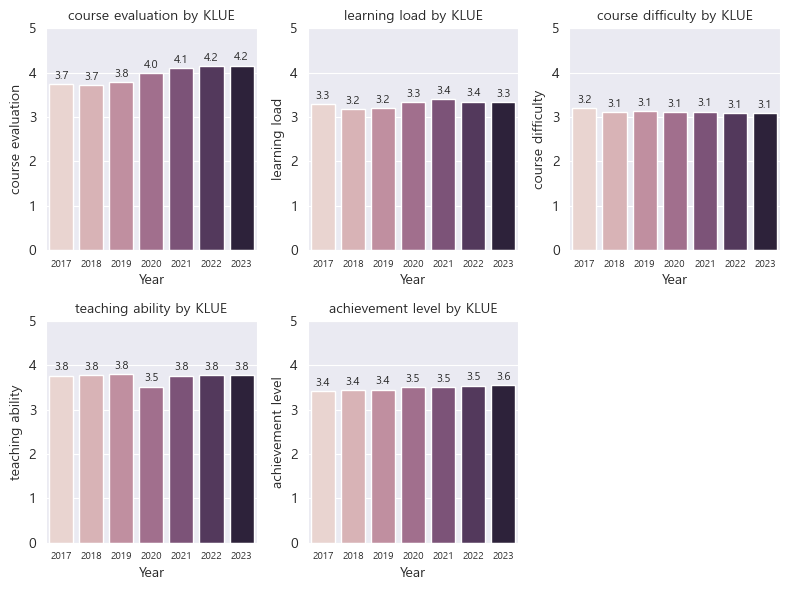

In [79]:
target_mean_column = ["course evaluation", "learning load", "course difficulty",
                      "teaching ability", "achievement level"]

num_cols = 3  # 한 행에 몇 개 그래프?
num_rows = (len(target_mean_column) + num_cols - 1) // num_cols  # 필요한 행 개수

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 3 * num_rows))
axes = axes.flatten()  # 2차원 배열을 1차원으로

for i, column in enumerate(target_mean_column):
    average_score_mean = group_by_year[column].mean().reset_index()
    sns.barplot(data=average_score_mean, x='Year', y=column, ax=axes[i], hue="Year")
    axes[i].set_title(f'{column} by KLUE', fontsize=10)
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Year')
    axes[i].tick_params(axis='x', labelsize=7)
    axes[i].legend().set_visible(False)
    axes[i].set_ylim(0.0, 5.0)

    for p in axes[i].patches:
        height = p.get_height()
        if height == 0: continue
        axes[i].text(
            p.get_x() + p.get_width() / 2,
            height + 0.05,
            f'{height:.1f}',
            ha='center',
            va='bottom',
            fontsize=8
        )

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [80]:
count_by_year

,Year,count
0,2017,4487
1,2018,4302
2,2019,4109
3,2020,4486
4,2021,4698
5,2022,4657
6,2023,4508


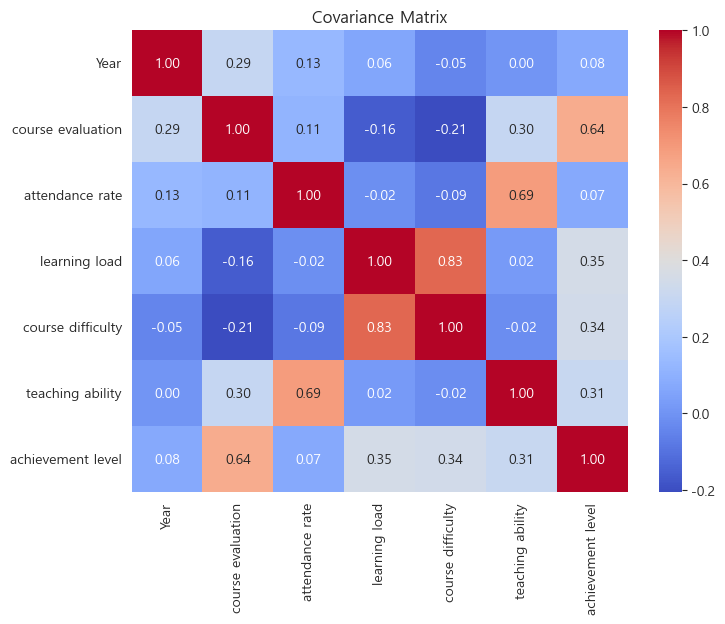

In [81]:
from sklearn.preprocessing import StandardScaler

# 수치형 변수만 정규화
numeric_df = klue_df.select_dtypes(include='number')

scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

cov_matrix = normalized_df.cov()

plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.yticks(rotation=0)
plt.title('Covariance Matrix')
plt.show()